In [2]:
import random 
import requests
import json
import matplotlib.pyplot as plt
import numpy as np

# Run an experiment

In [16]:
def run_experiment(steps, method):
    """
        steps
            how many queries to make
        method
            an object that implements selectAd(), update(ad, ad_reward), and __str__()
    """
    mean_reward = []
    ad_history = []
    total_reward = 0
    for i in range(steps):
        ad = method.selectAd()
        ad_gen = "https://755vgi76zg.execute-api.us-east-1.amazonaws.com/prod"
        data = {
            "ad": ad
        }
        response = requests.post(ad_gen, json.dumps(data))
        resp = json.loads(response.content) 
        ad_reward = int(resp["body"][1])

        method.update(ad, ad_reward)
        total_reward += ad_reward
        mean_reward.append(total_reward / (i + 1))
        ad_history.append(ad)
    
    x = [r for r in mean_reward]
    y = [_ for _ in range(steps)]

    plt.scatter(y, x)
    plt.show()

    with open("historical_results.txt", "a") as f:
        f.write(f"Method: {method} scored Mean Reward: {mean_reward[-1]} after {steps} steps\n")

    print(f"Total reward is: {total_reward}")

    return ad_history

# Random Choice

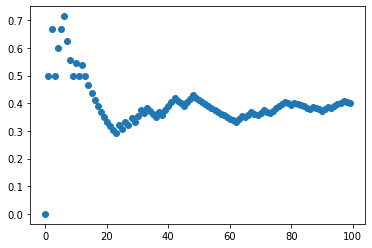

Total reward is: 40


In [25]:
class Random:
    ad_list = ['ad_1', 'ad_2', 'ad_3', 'ad_4', 'ad_5']

    def selectAd(self):
        return random.choice(self.ad_list)

    def update(self, ad, ad_reward):
        return

    def __str__(self):
        return "Random"

ad_history = run_experiment(100, Random())

# Pick the Ad with Max Mean Reward

Initialize the AdData assuming that each ad has produced exactly 1/1 success. 

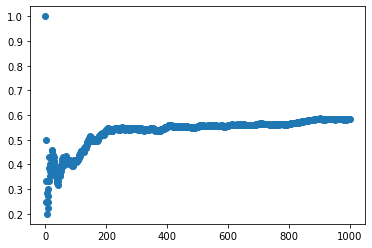

Total reward is: 583


In [6]:
class AdData:
    mean_reward = 1
    num_success = 1
    total_times_shown = 1

    def __str__(self):
        return f"MeanReward: {self.mean_reward}, NumSuccess: {self.num_success}, TotalTimesShown: {self.total_times_shown}"

    def __gt__(self, other):
        return(self.mean_reward > other.mean_reward)

class MaxMeanReward:
    def __init__(self):
        self.ad_list = ['ad_1', 'ad_2', 'ad_3', 'ad_4', 'ad_5']
        self.ad_data = {ad: AdData() for ad in self.ad_list} 

    def selectAd(self):
        return max(self.ad_data, key=self.ad_data.get)

    def update(self, ad, ad_reward):
        self.ad_data[ad].num_success += ad_reward
        self.ad_data[ad].total_times_shown += 1
        self.ad_data[ad].mean_reward = self.ad_data[ad].num_success / self.ad_data[ad].total_times_shown

    def __str__(self):
        return "MaxMeanReward"

ad_history = run_experiment(1000, MaxMeanReward())

# e-Greedy Method

Pick an ad at random with probability e. Pick the max mean reward ad with probability 1 - e

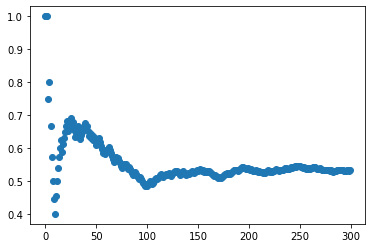

Total reward is: 160


In [29]:
class EGreedy:
    def __init__(self, e):
        self.ad_list = ['ad_1', 'ad_2', 'ad_3', 'ad_4', 'ad_5']
        self.ad_data = {ad: AdData() for ad in self.ad_list} 
        self.e = e

    def selectAd(self):
        if np.random.uniform(0, 1) <= self.e:
            return random.choice(self.ad_list)
        else:
            return max(self.ad_data, key=self.ad_data.get)

    def update(self, ad, ad_reward):
        self.ad_data[ad].num_success += ad_reward
        self.ad_data[ad].total_times_shown += 1
        self.ad_data[ad].mean_reward = self.ad_data[ad].num_success / self.ad_data[ad].total_times_shown

    def __str__(self):
        return f"EGreedy(e={self.e})"

ad_history = run_experiment(300, EGreedy(0.1))

# e-Greedy with Decaying Randomness

The probability of selecting a random ad is a^x where a is a value between 0-1 passed in at initialization and x is the number of steps taken. If a random ad is not selected then the best ad so far is selected (by mean reward)

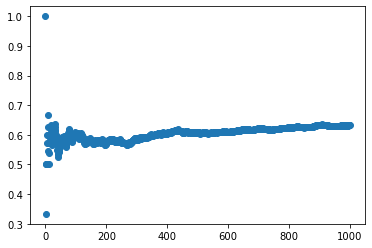

Total reward is: 633


In [35]:
class ExpDecayGreedy:
    def __init__(self, a):
        self.ad_list = ['ad_1', 'ad_2', 'ad_3', 'ad_4', 'ad_5']
        self.ad_data = {ad: AdData() for ad in self.ad_list} 
        self.a = a
        self.steps = 0

    def selectAd(self):
        if np.random.uniform(0, 1) <= self.a ** self.steps:
            return random.choice(self.ad_list)
        else:
            return max(self.ad_data, key=self.ad_data.get)

    def update(self, ad, ad_reward):
        self.ad_data[ad].num_success += ad_reward
        self.ad_data[ad].total_times_shown += 1
        self.ad_data[ad].mean_reward = self.ad_data[ad].num_success / self.ad_data[ad].total_times_shown
        self.steps += 1

    def __str__(self):
        return f"ExpDecayGreedy(a={self.a})"

ad_history = run_experiment(1000, ExpDecayGreedy(0.95))

# What's the best ad?

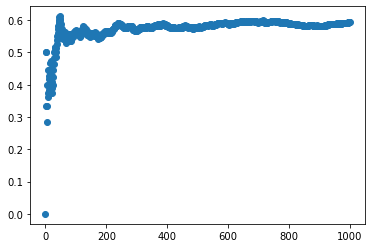

Total reward is: 594


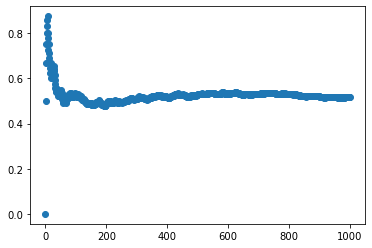

Total reward is: 517


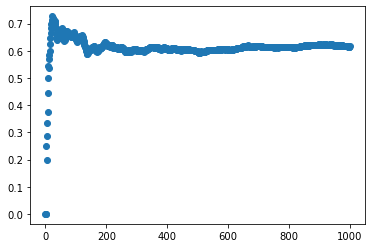

Total reward is: 616


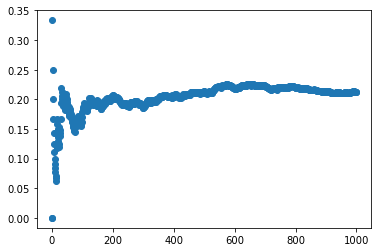

Total reward is: 213


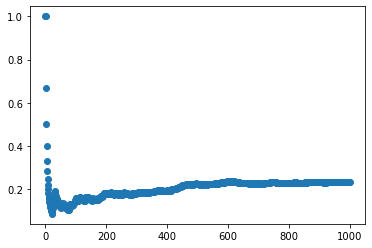

Total reward is: 233


In [5]:
class Constant:
    def __init__(self, ad):
        self.ad = ad

    def selectAd(self):
        return self.ad

    def update(self, ad, ad_reward):
        return

    def __str__(self):
        return f"Constant({self.ad})"

for ad in ['ad_1', 'ad_2', 'ad_3', 'ad_4', 'ad_5']:
    ad_history = run_experiment(1000, Constant(ad))

# Empirical CTR for Each Ad:
* ad_1: 0.61333
* ad_2: 0.51333
* ad_3: 0.64666
* ad_4: 0.23666
* ad_5: 0.21333

# Thompson Sampling

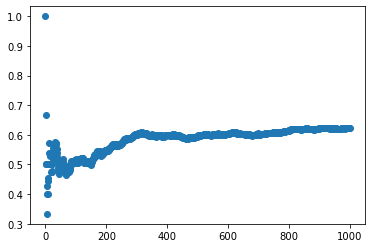

Total reward is: 622


In [9]:
class AdData1:
    mean_reward = 0
    num_success = 0
    total_times_shown = 0
    alpha = 1
    beta = 1

    def __str__(self):
        return f"MeanReward: {self.mean_reward}, NumSuccess: {self.num_success}, TotalTimesShown: {self.total_times_shown}"

    def __gt__(self, other):
        return(self.mean_reward > other.mean_reward)

class ThompsonSampling:
    def __init__(self):
        self.ad_list = ['ad_1', 'ad_2', 'ad_3', 'ad_4', 'ad_5']
        self.ad_data = {ad: AdData1() for ad in self.ad_list} 

    def selectAd(self):
        best_ad = ""
        best_draw = -float("inf")
        for ad in self.ad_list:
            draw = np.random.beta(self.ad_data[ad].alpha, self.ad_data[ad].beta, size=1)[0]
            if draw > best_draw:
                best_draw = draw
                best_ad = ad
        return best_ad

    def update(self, ad, ad_reward):
        self.ad_data[ad].num_success += ad_reward
        self.ad_data[ad].total_times_shown += 1
        self.ad_data[ad].mean_reward = self.ad_data[ad].num_success / self.ad_data[ad].total_times_shown
        if ad_reward:
            self.ad_data[ad].alpha += 1
        else:
            self.ad_data[ad].beta += 1

    def __str__(self):
        return f"ThompsonSampling"

ad_history = run_experiment(1000, ThompsonSampling())

# How quickly do we declare Ad_3 the best?

In [17]:
ad_history = run_experiment(1000, ThompsonSampling())
ad_history1 = run_experiment(1000, ExpDecayGreedy(0.8))

In [ ]:
x = [int(x[-1]) for x in ad_history]
y = [_ for _ in range(1000)]

plt.scatter(y, x)
plt.show()

TypeError: 'NoneType' object is not iterable

In [ ]:
x = [int(x[-1]) for x in ad_history1]
y = [_ for _ in range(1000)]

plt.scatter(y, x)
plt.show()

# Learnings

The best solutions used some balance of exploration and exploitation.

Each method had its own way of initially figuring out the CTR of the ads and converging to pick out the best ad. The algorithm which converges the fastest wins. Since there is some randomness involved, some solutions may converge to the best ad much faster 

# Room for Improvements

* I should have started tracking my experiments earlier in the competition to have more data
* I should have run more robust hyperparameter tuning to account for randomness between different methods (averaging over multiplte experiments)

# Next Steps

* I'd like to see how this same problem looks when each of the ad click distributions vary over time. In this competition, the distributions were fixed so the name of the game was "how to pick ad_3 the fastest". However, in real life people get tired of ads, there are seasonal trends, and people have changing preferences. Accounting for this over time would be very interesting. 

# References

https://towardsdatascience.com/multi-armed-bandits-and-reinforcement-learning-dc9001dcb8da

https://www.spotx.tv/resources/blog/developer-blog/introduction-to-multi-armed-bandits-with-applications-in-digital-advertising/

